# Importações

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
from sqlalchemy import create_engine
from statsmodels.tsa.seasonal import MSTL



# Conexão ao PostgreSQl

In [1]:
# user = "avnadmin"
# password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
# host = "postgresql-iscac.f.aivencloud.com"
# port = "25674"
# bucket = "Seasonality"

# # URL de conexão com PostgreSQL
# engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

# #Nome da tabela 
# meteorology ='bicycle_counter'

# Importar dados do PostgreSQL

In [4]:
# Como a Api ainda não esta a funcionar, vou importar os dados de um csv
df = pd.read_csv('../all_bike_counts.csv', parse_dates=['detected'], dtype='int32')
df = df.set_index('detected')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22632 entries, 2021-08-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   direction_2   22632 non-null  int32
 1   count_2       22632 non-null  int32
 2   direction_3   22632 non-null  int32
 3   count_3       22632 non-null  int32
 4   direction_4   22632 non-null  int32
 5   count_4       22632 non-null  int32
 6   direction_5   22632 non-null  int32
 7   count_5       22632 non-null  int32
 8   direction_6   22632 non-null  int32
 9   count_6       22632 non-null  int32
 10  direction_7   22632 non-null  int32
 11  count_7       22632 non-null  int32
 12  direction_8   22632 non-null  int32
 13  count_8       22632 non-null  int32
 14  direction_9   22632 non-null  int32
 15  count_9       22632 non-null  int32
 16  direction_10  22632 non-null  int32
 17  count_10      22632 non-null  int32
 18  direction_11  22632 non-null  i

In [5]:
df_loc = pd.read_csv('../all_counter_locations.csv')
df_loc.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   locationId         31 non-null     int64  
 1   tenantIdentifier   31 non-null     object 
 2   name               31 non-null     object 
 3   cp7                31 non-null     object 
 4   freguesia          31 non-null     object 
 5   directionPositive  0 non-null      float64
 6   directionNegative  0 non-null      float64
 7   latitude           31 non-null     float64
 8   longitude          31 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.3+ KB



# Analise descritiva

In [6]:
df.tail()

direction_2  count_2  direction_3  count_3  direction_4  \
detected                                                                       
2024-02-29 19:00:00           15       35           26      240           13   
2024-02-29 20:00:00           17       35           11      144           11   
2024-02-29 21:00:00           11       13            2       22           10   
2024-02-29 22:00:00            6       20          174      177            4   
2024-02-29 23:00:00            3       10          210      214           18   

                     count_4  direction_5  count_5  direction_6  count_6  ...  \
detected                                                                  ...   
2024-02-29 19:00:00       32           22       77           30      173  ...   
2024-02-29 20:00:00       17           20       46           12       99  ...   
2024-02-29 21:00:00       13            7       19            6       27  ...   
2024-02-29 22:00:00        5           14       21           18       32  ...   
2024-02-29 23:00:00       22           74       86          104      126  ...   

                     direction_31  count_31  direction_32  count_32  \
detected                                                              
2024-02-29 19:00:00             2        12             3        21   
2024-02-29 20:00:00             1         4             3         9   
2024-02-29 21:00:00             3         5             3        10   
2024-02-29 22:00:00             1         1             2         2   
2024-02-29 23:00:00             3         4             0         3   

                     direction_33  count_33  direction_34  count_34  \
detected                                                              
2024-02-29 19:00:00            17        47            19        81   
2024-02-29 20:00:00            17        29            13        49   
2024-02-29 21:00:00             8        13            17        42   
2024-02-29 22:00:00             5        12            11        31   
2024-02-29 23:00:00             4        13            12        30   

                     direction_35  count_35  
detected                                     
2024-02-29 19:00:00            13        43  
2024-02-29 20:00:00            14        39  
2024-02-29 21:00:00            14        46  
2024-02-29 22:00:00             8        24  
2024-02-29 23:00:00            20        39  

[5 rows x 62 columns]

In [7]:
df.loc['2022'].tail(2)

direction_2  count_2  direction_3  count_3  direction_4  \
detected                                                                       
2022-12-31 22:00:00            0        7            2        2            2   
2022-12-31 23:00:00            1       11            0        1            1   

                     count_4  direction_5  count_5  direction_6  count_6  ...  \
detected                                                                  ...   
2022-12-31 22:00:00        2            2        5            9       15  ...   
2022-12-31 23:00:00        3            5        6           10       14  ...   

                     direction_31  count_31  direction_32  count_32  \
detected                                                              
2022-12-31 22:00:00             1         1             1        15   
2022-12-31 23:00:00             2         2             4        14   

                     direction_33  count_33  direction_34  count_34  \
detected                                                              
2022-12-31 22:00:00            26       127            52        87   
2022-12-31 23:00:00            15       238            99       138   

                     direction_35  count_35  
detected                                     
2022-12-31 22:00:00            12        55  
2022-12-31 23:00:00            24       100  

[2 rows x 62 columns]

In [8]:
#print(df.head(2))
print()
df_loc.head(2)

locationId          tenantIdentifier                              name  \
0           2  lisboa.pt.mycycletraffic  #18 - Avenida do Colégio Militar   
1           3  lisboa.pt.mycycletraffic  #01 - Telheiras - Colégio Alemão   

        cp7 freguesia  directionPositive  directionNegative   latitude  \
0  1500-069   Benfica                NaN                NaN  38.749623   
1  1600-616    Lumiar                NaN                NaN  38.759682   

   longitude  
0  -9.191153  
1  -9.164044

# Análises

### 1.Visualizar todas as localizações

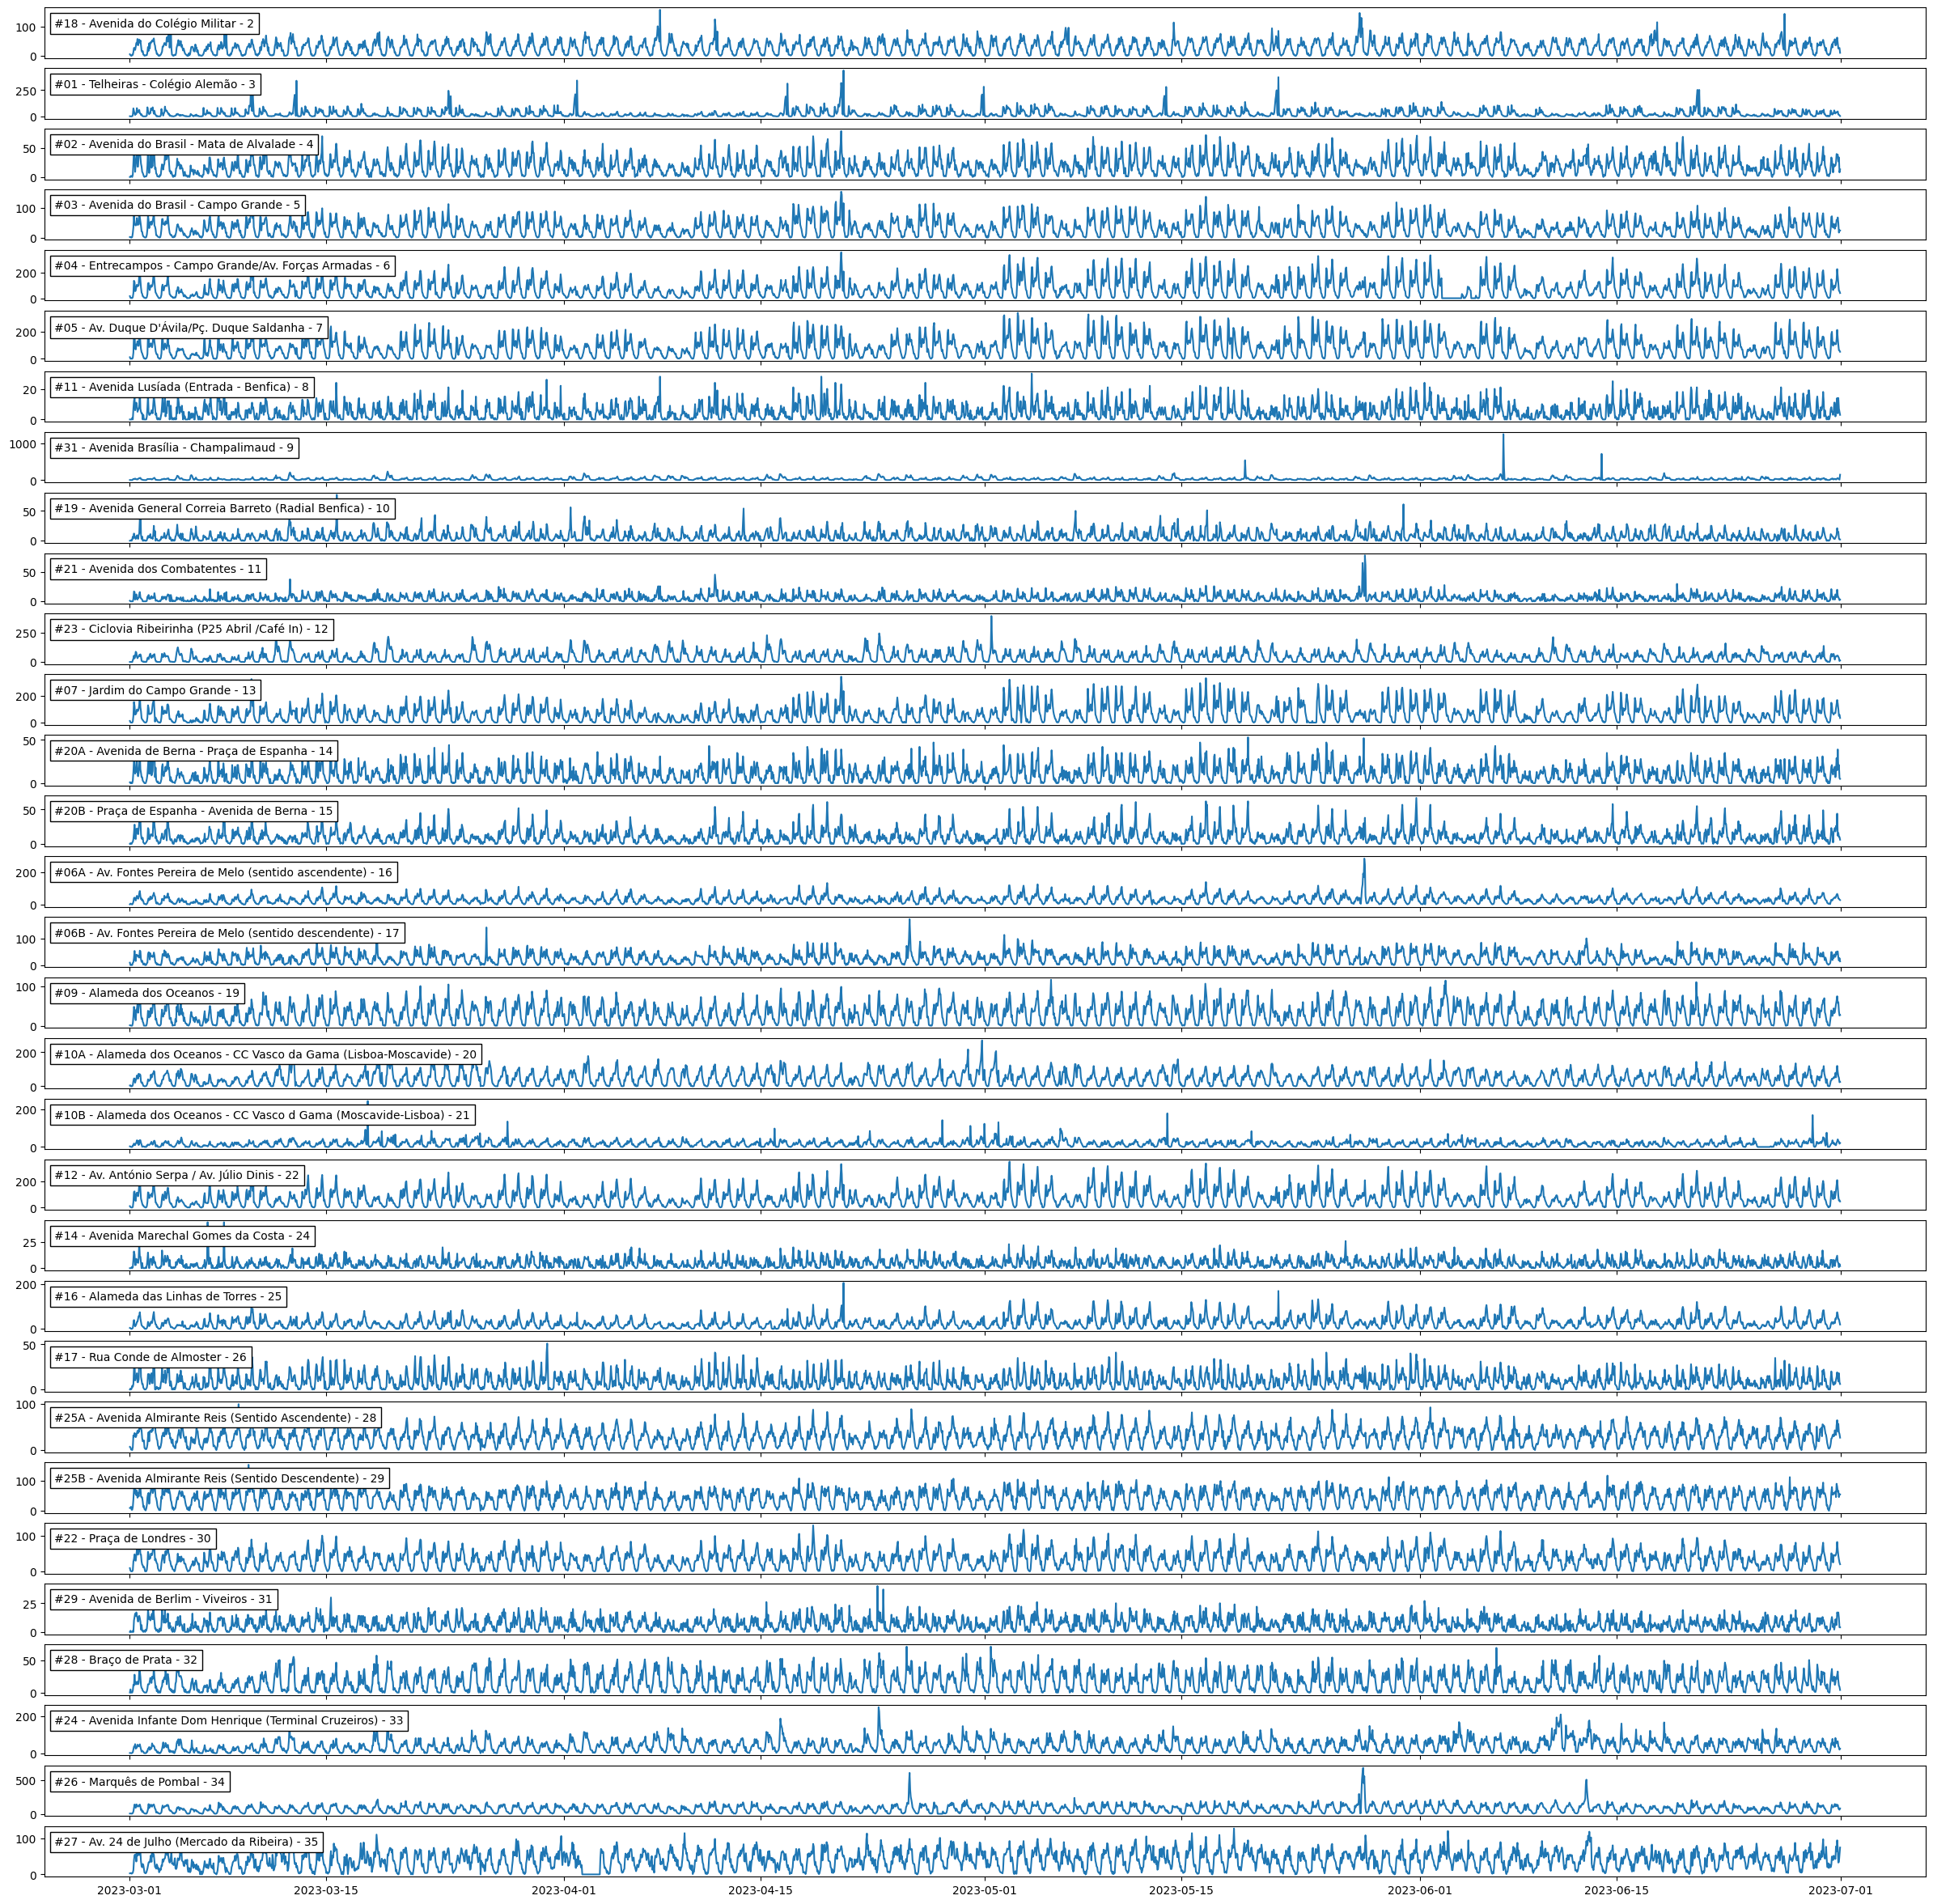

In [5]:
locationId_all = df_loc.locationId.to_list()  # converte a coluna location numa lista
locationId_remove = [] # lista de ID´s que se pretende remover, mas neste caso esta vazia
locationId_keep = [elem for elem in locationId_all if elem not in locationId_remove] #Filtra esses IDs com base em locationId_remove para obter os IDs a serem mantidos

fig, ax = plt.subplots(len(locationId_keep), 1, figsize=(30,30), sharex=True) # grafico que vai criar varios subplots, sendo que o tamanho do  gráfico é igual ao número de id´s
for i,location in enumerate(locationId_keep):
    ax[i].plot(df.query('"2023-03"<index<"2023-07"').loc[:,f'count_{location}']) #intervalo das datas que se pretende ver o gráfico
    counter_name = AnchoredText(df_loc.query('locationId == @location').name.values[0] + ' - ' + str(location), loc="upper left")
    ax[i].add_artist(counter_name)
plt.show()

### Visualização sazonal

In [6]:
# Prepação dos dados para o gráfico
def prep_df_fig(df_all, start_date, end_date, column):
    df_raw = df_all.query('@start_date <= index < @end_date').filter([column])
    df_raw = df_raw.assign(
        woy = df_raw.index.isocalendar().week,
        dow = df_raw.index.dayofweek,
        hod = df_raw.index.hour
        ).reset_index()
    df_raw = df_raw.assign(idx = (df_raw.dow)*24 + df_raw.hod)
    df_fig = df_raw.pivot(index='idx', columns='woy', values=column)
    df_fig = df_fig.assign(mean_hour = df_fig.agg('mean', axis=1))
    return df_fig

# Gera uma lista de posições para o eixo X (ticks) com base em dias e horas. 
def prep_ticks_fig(hour_list):
    hour_list_aux = [0] + hour_list
    tick_list = []
    tick_label_list = []
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for i,d in zip(np.arange(0, 167, 24),days):
        tick_list_aux = hour_list_aux + i
        tick_list = tick_list + tick_list_aux.tolist()
        tick_label_list_aux = [d] + [str(h)+':00' for h in hour_list]
        tick_label_list = tick_label_list + tick_label_list_aux
    return tick_list, tick_label_list

# Faz o gráfico de linhas
def plot_weekly_count(df_all, df_all_loc, start_date, end_date, loc, hour_list):
    location_name = df_all_loc.query('locationId == @loc').name.values[0]
    column = 'count_' + str(location)
    df_plot = prep_df_fig(df_all, start_date, end_date, column)
    tick_list, tick_label_list = prep_ticks_fig(hour_list)
    fig,ax = plt.subplots(1, 1, figsize=(26,4))
    for i in tick_list:
        if i in np.arange(0, 167, 24):
            ax.axvline(i, color='cadetblue', linestyle='dashed', linewidth=1.5)
        else:
            ax.axvline(i, color='aliceblue', linestyle='dashed')
    for i in list(range(len(df_plot.columns[:-1]))):
        ax.plot(df_plot.iloc[:,i], color='gray', alpha=0.15, linewidth=1.5)
    ax.plot(df_plot.iloc[:,-1], color='indianred', alpha=0.8, linewidth=1.5, label='mean')
    plt.xticks(ticks=tick_list, labels=tick_label_list)
    ax.set_title(f'Weekly count at {location_name}   ({start_date} - {end_date})')
    ax.legend()
    plt.show()

# Faz o gráfico de barras
def plot_weekly_bar_count(df_all, df_all_loc, start_date, end_date, loc, hour_list):
    # Filtrar o nome da localização
    location_name = df_all_loc.query('locationId == @loc').name.values[0]
    
    # Selecionar a coluna de contagem baseada no ID da localização
    column = f'count_{location}'
    
    # Preparar os dados com a função já existente
    df_plot = prep_df_fig(df_all, start_date, end_date, column)
    tick_list, tick_label_list = prep_ticks_fig(hour_list)
    
    # Calcular a média de contagem por hora/dia
    mean_per_hour = df_plot.iloc[:, :-1].mean(axis=1)
    
    # Criar o gráfico de barras
    fig, ax = plt.subplots(figsize=(26, 4))
    ax.bar(df_plot.index, mean_per_hour, color='skyblue', alpha=0.8, label='Mean Count')

    # Adicionar divisões nos dias da semana
    for i in np.arange(0, 167, 24):
        ax.axvline(i, color='cadetblue', linestyle='dashed', linewidth=1.5)

    # Configurar o eixo X com os rótulos de horas e dias
    plt.xticks(ticks=tick_list, labels=tick_label_list, rotation=45, ha='right')
    ax.set_title(f'Weekly Count (Bar Plot) at {location_name} ({start_date} - {end_date})')
    ax.set_ylabel('Mean Count')
    ax.legend()
    plt.tight_layout()
    plt.show()

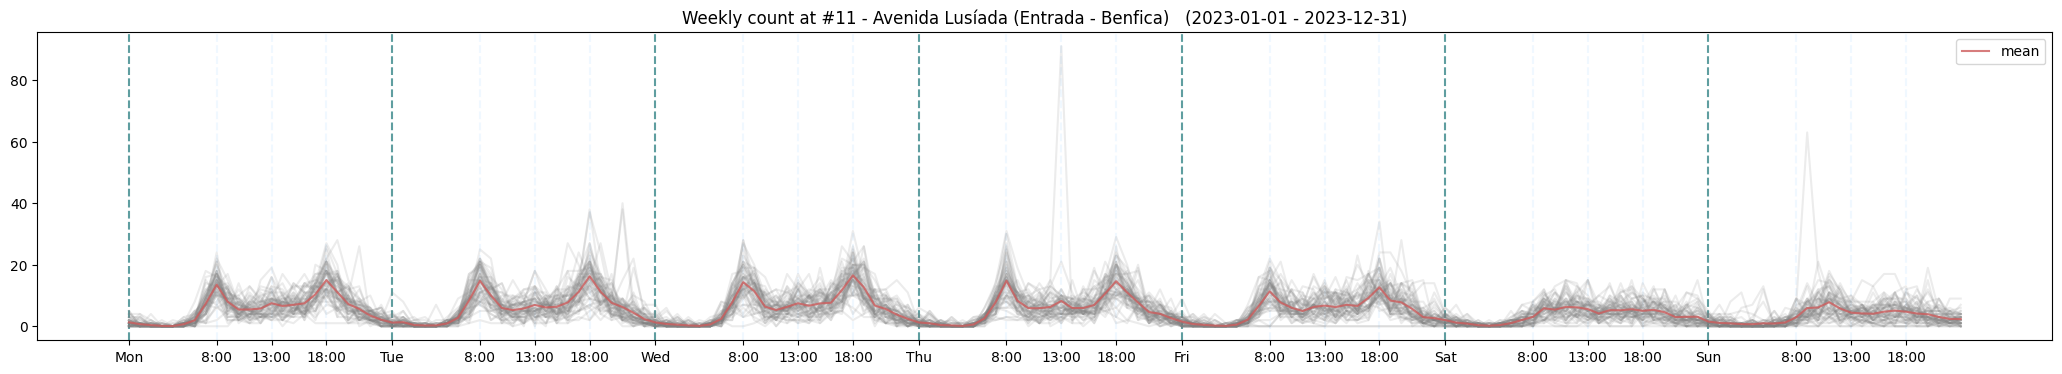

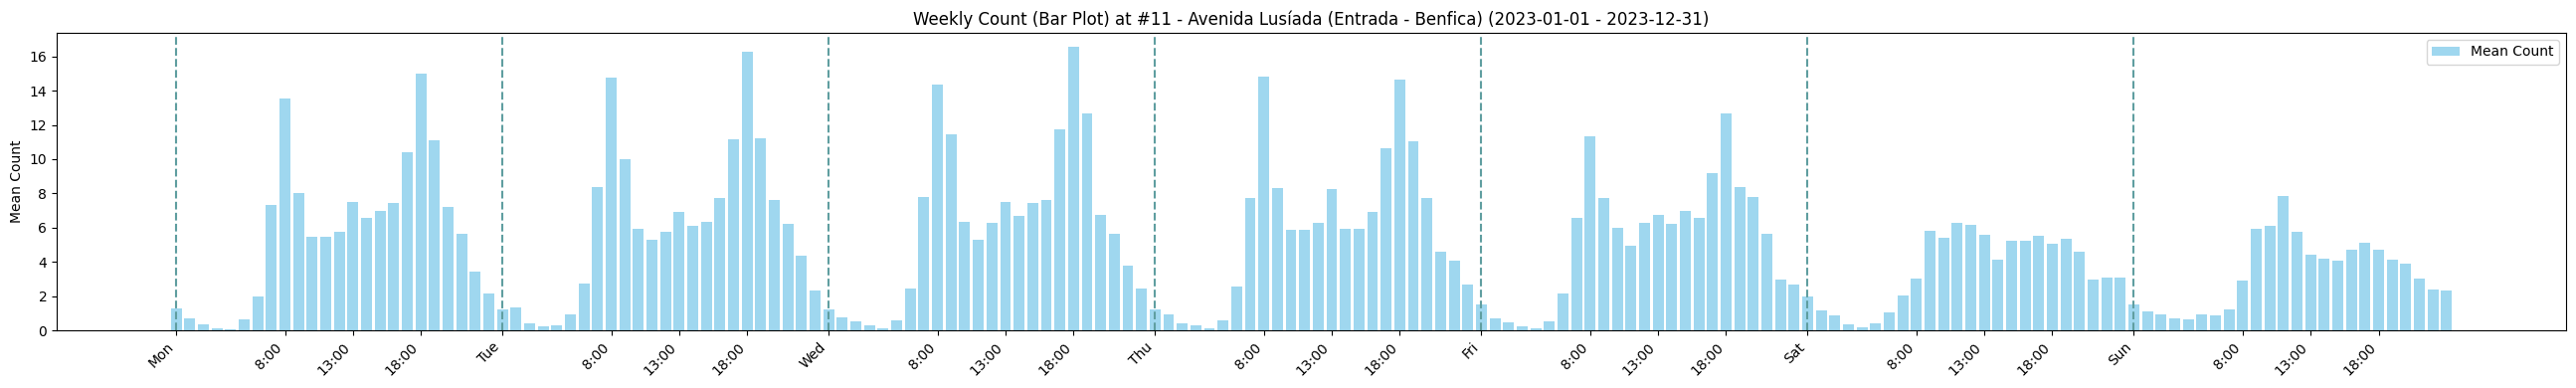

In [7]:
# Para o ano 2023 completo
location = 8
s_date = "2023-01-01"
e_date = "2023-12-31"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)
plot_weekly_bar_count(df, df_loc, s_date, e_date, location, ticks_hours)

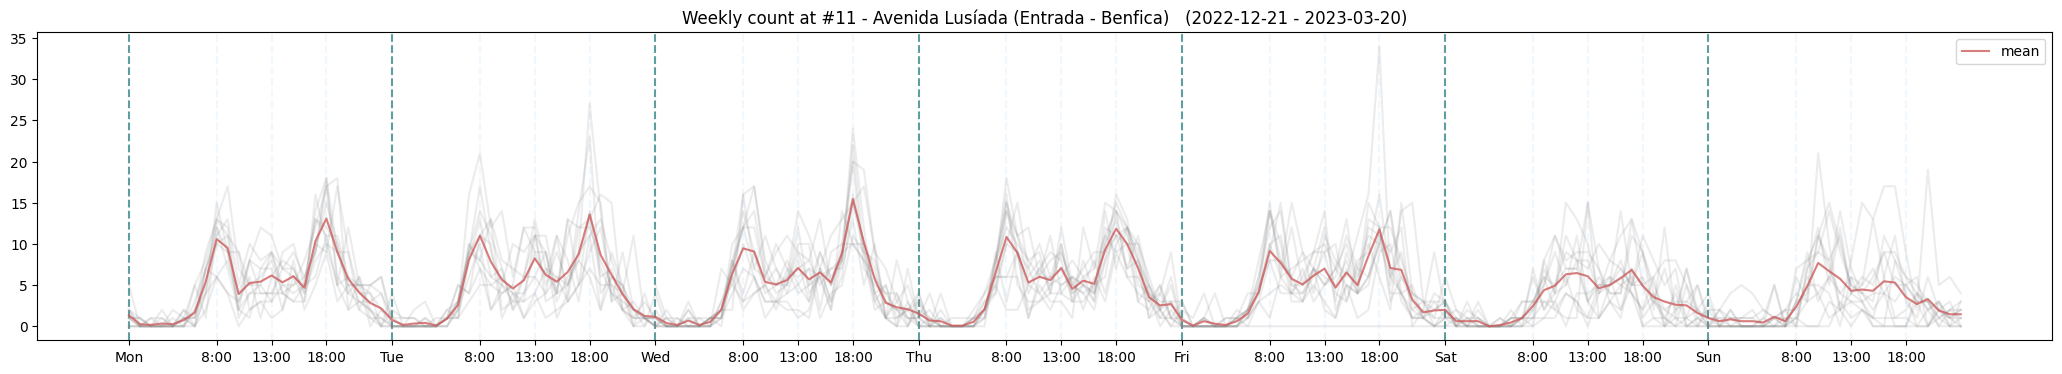

In [8]:
# inverno
location = 8
s_date = "2022-12-21"
e_date = "2023-03-20"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)

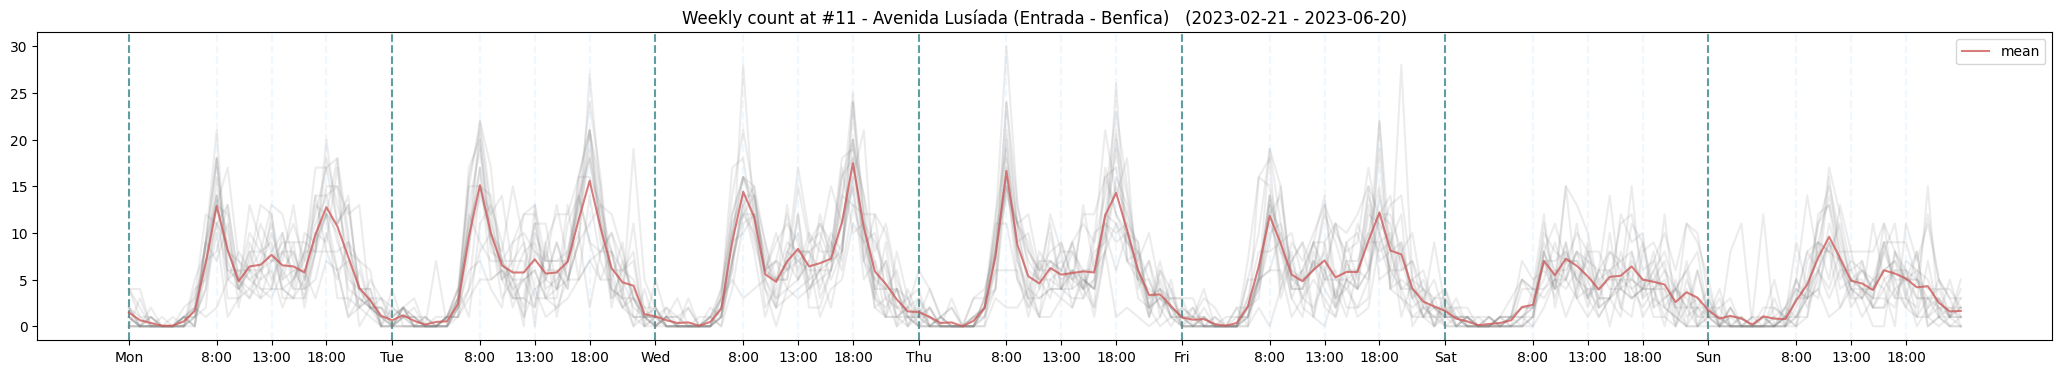

In [9]:
# primavera
location = 8
s_date = "2023-02-21"
e_date = "2023-06-20"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)

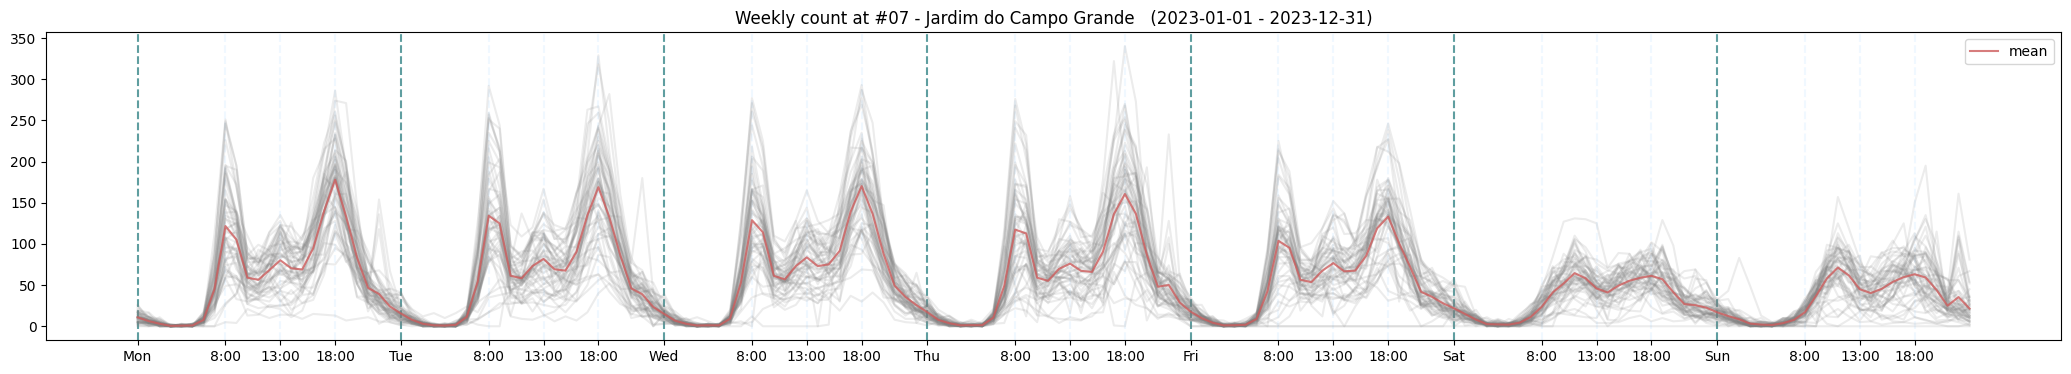

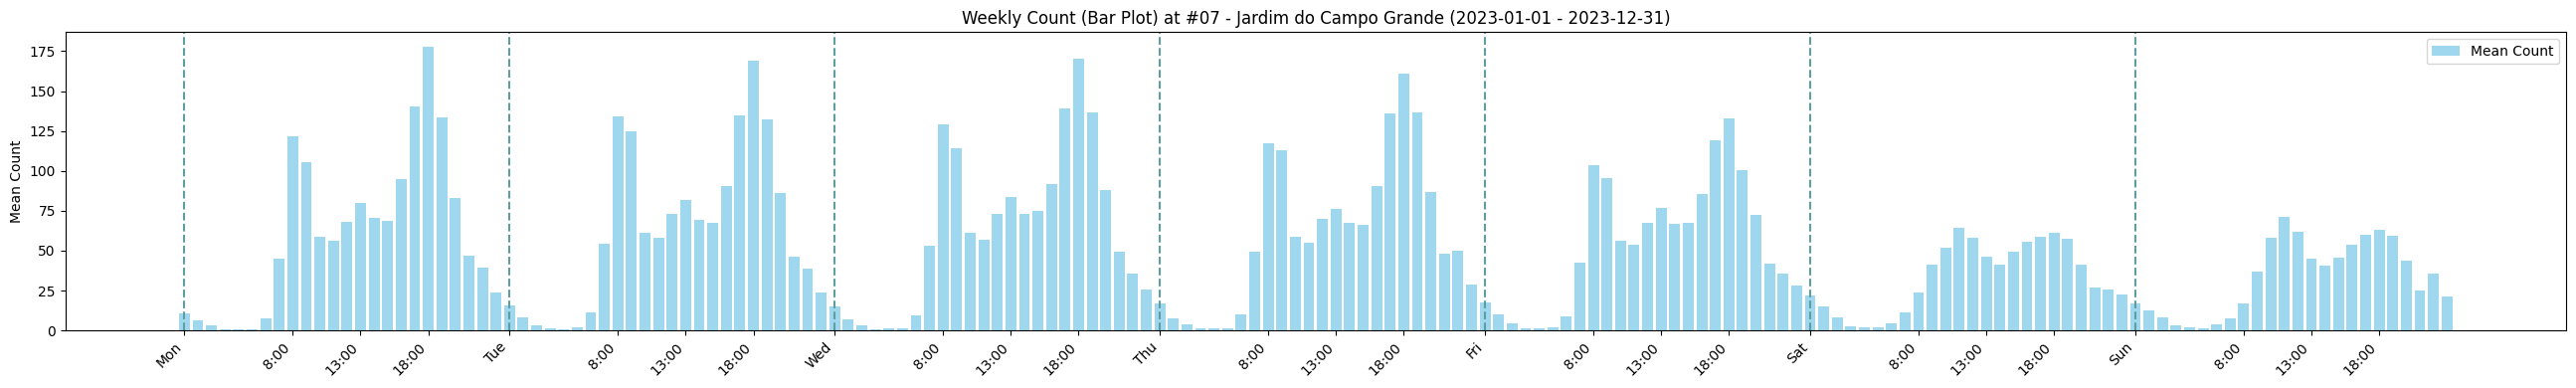

In [10]:
# para o ano 2023 mas para a localidade 13
location = 13
s_date ="2023-01-01"
e_date = "2023-12-31"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)
plot_weekly_bar_count(df, df_loc, s_date, e_date, location, ticks_hours)

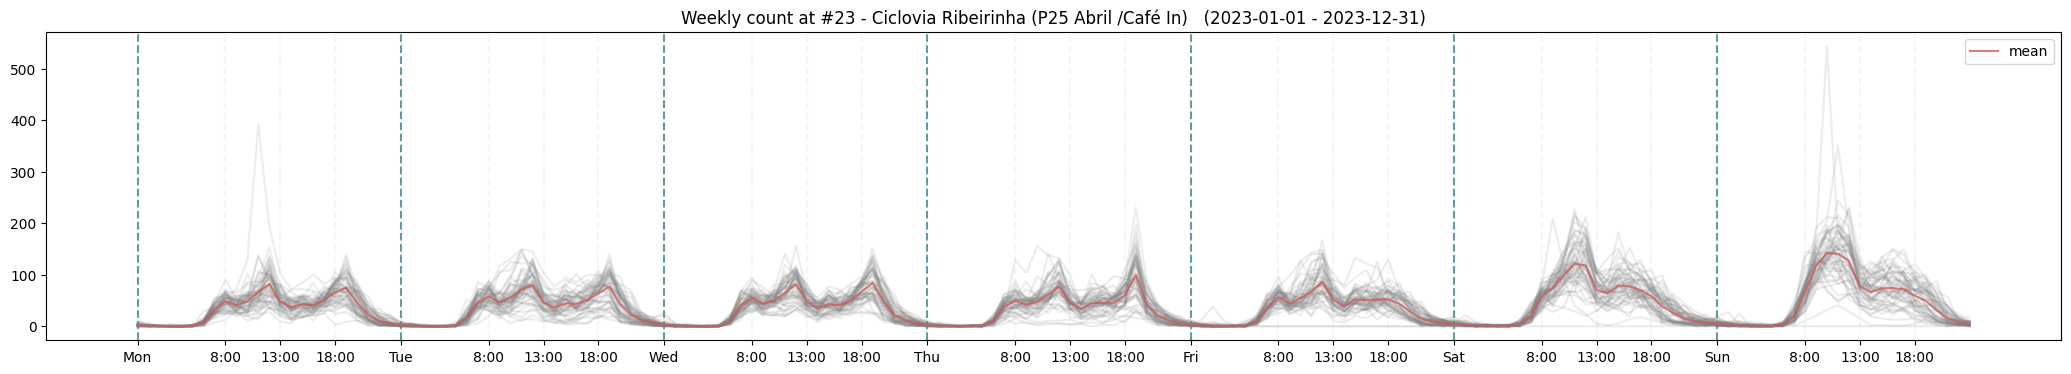

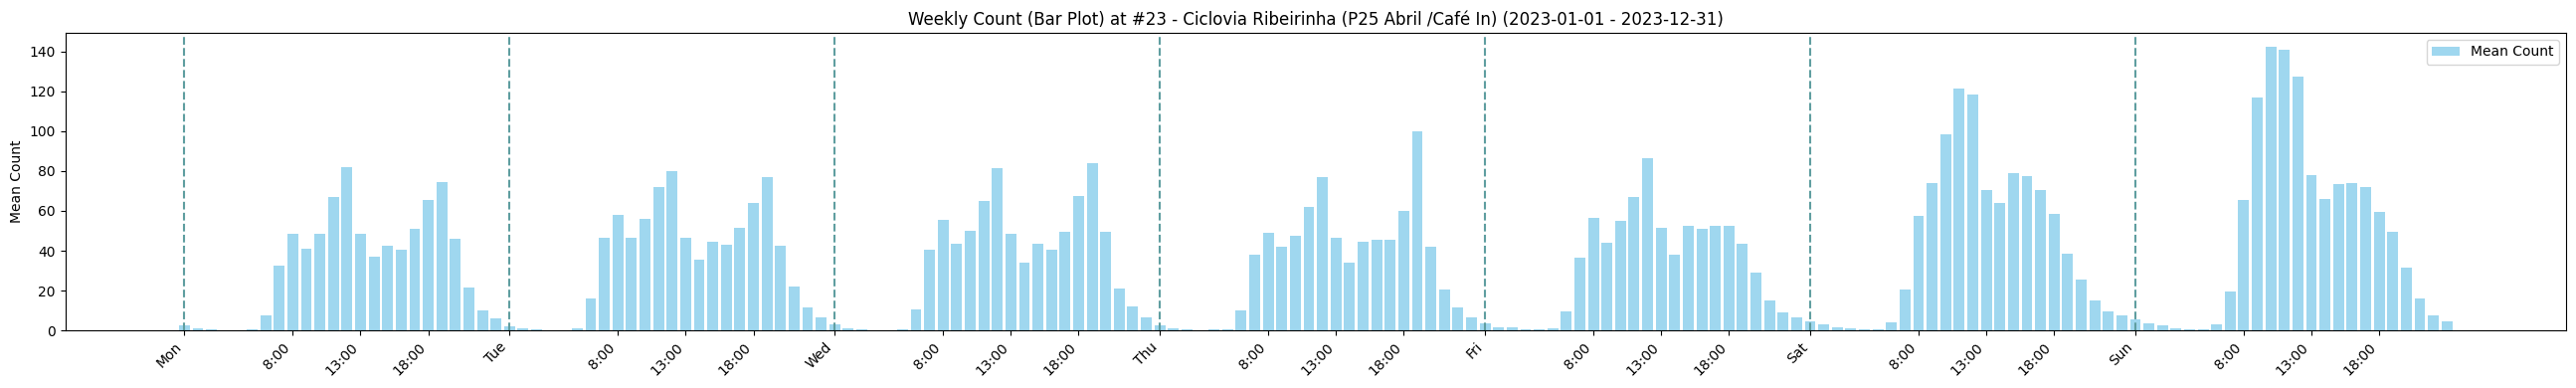

In [11]:
#para a localidade 12 no ano 2023 (temos maior uso ao fim de semana)
location = 12
s_date ="2023-01-01"
e_date = "2023-12-31"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)
plot_weekly_bar_count(df, df_loc, s_date, e_date, location, ticks_hours)

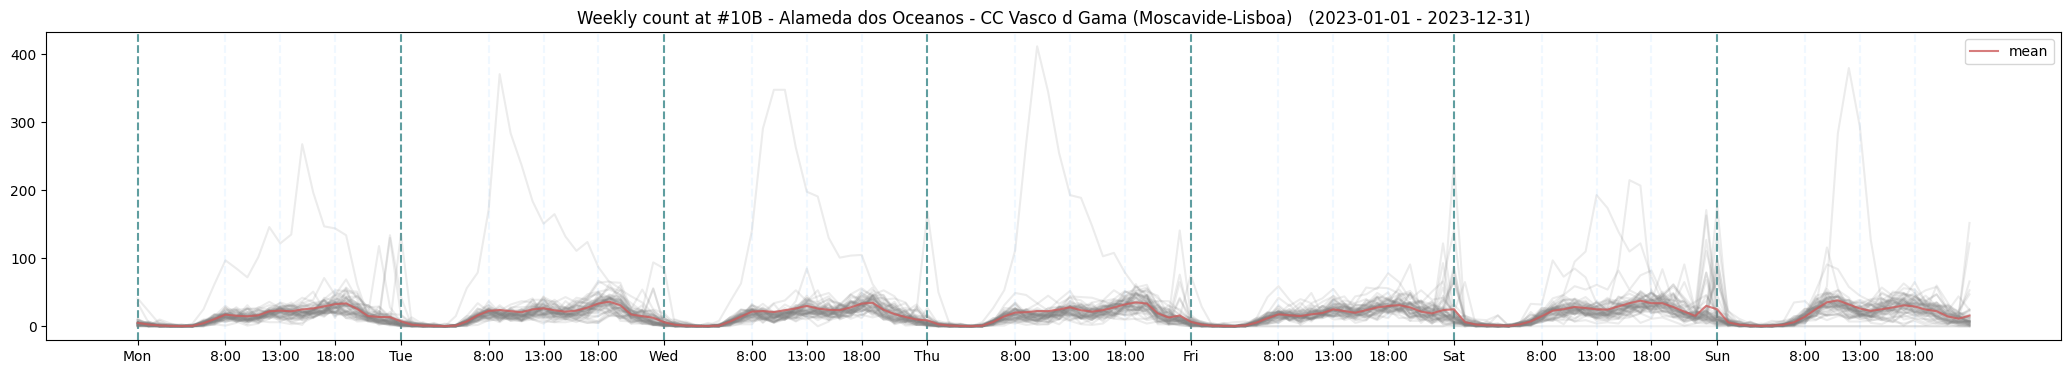

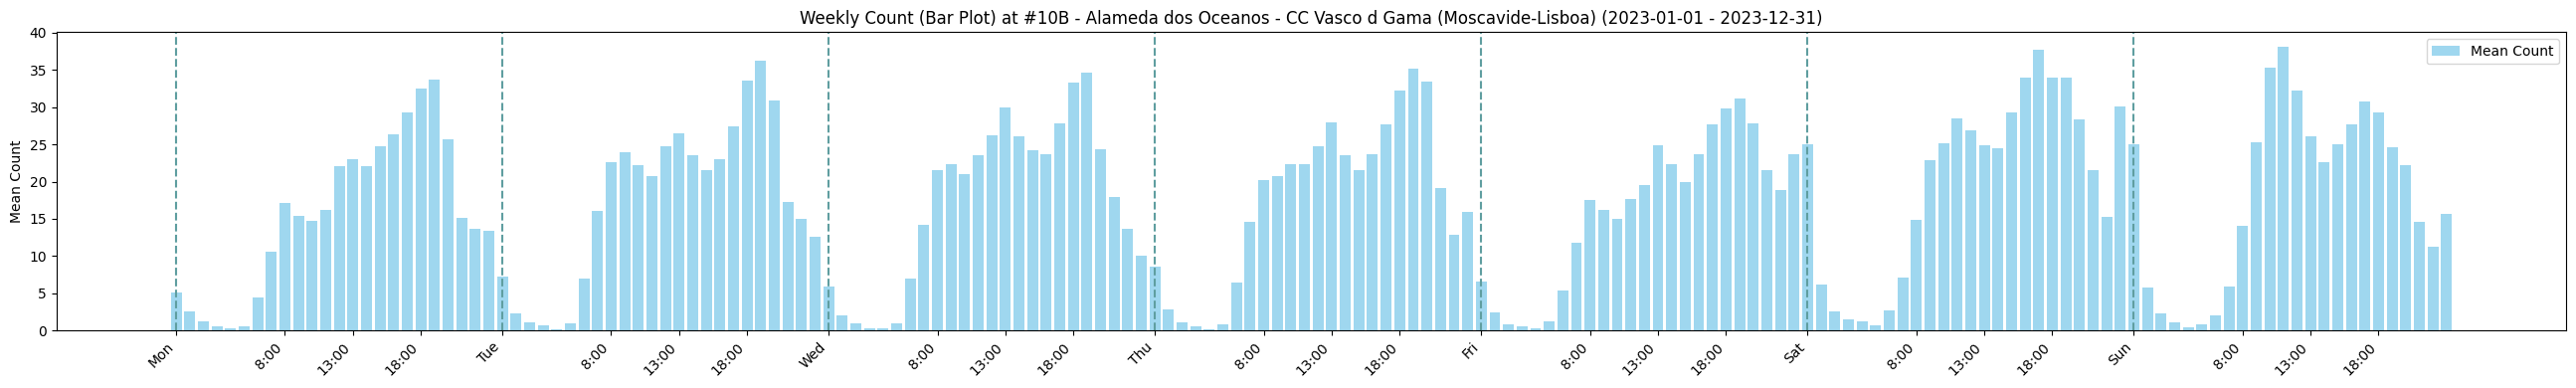

In [12]:
# Localizaçãp 21 para o ano 2023 (o uso é relativamente baixo e constante ao longo da semana e fim de semana)
location = 21
s_date ="2023-01-01"
e_date = "2023-12-31"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)
plot_weekly_bar_count(df, df_loc, s_date, e_date, location, ticks_hours)

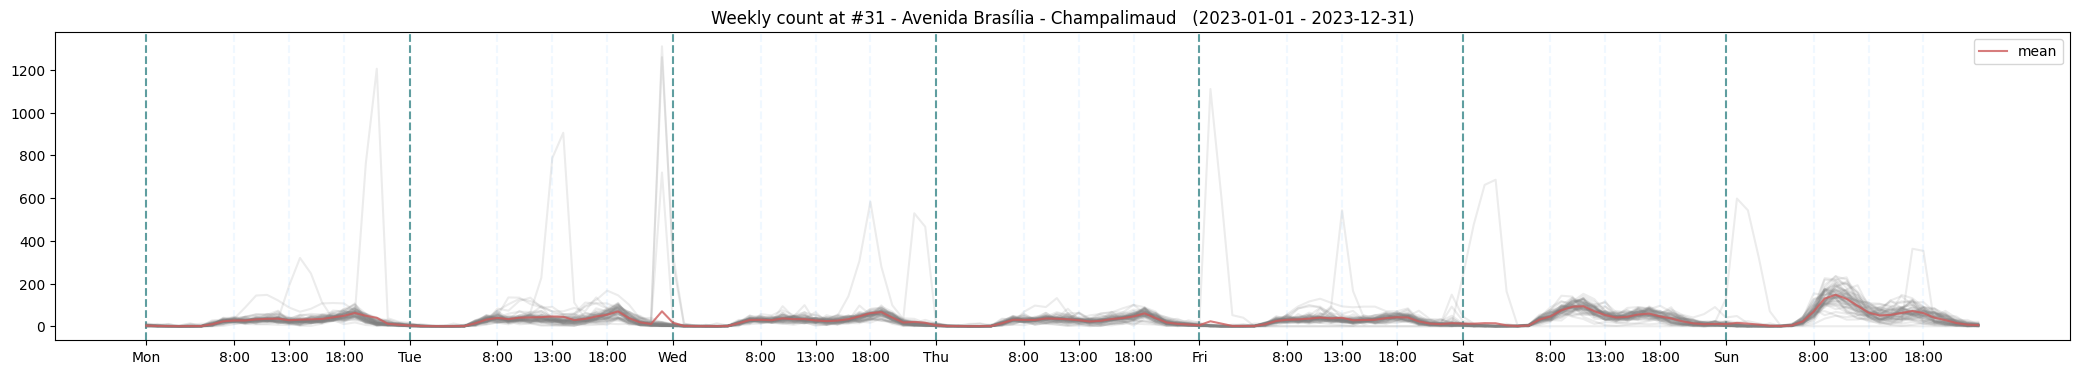

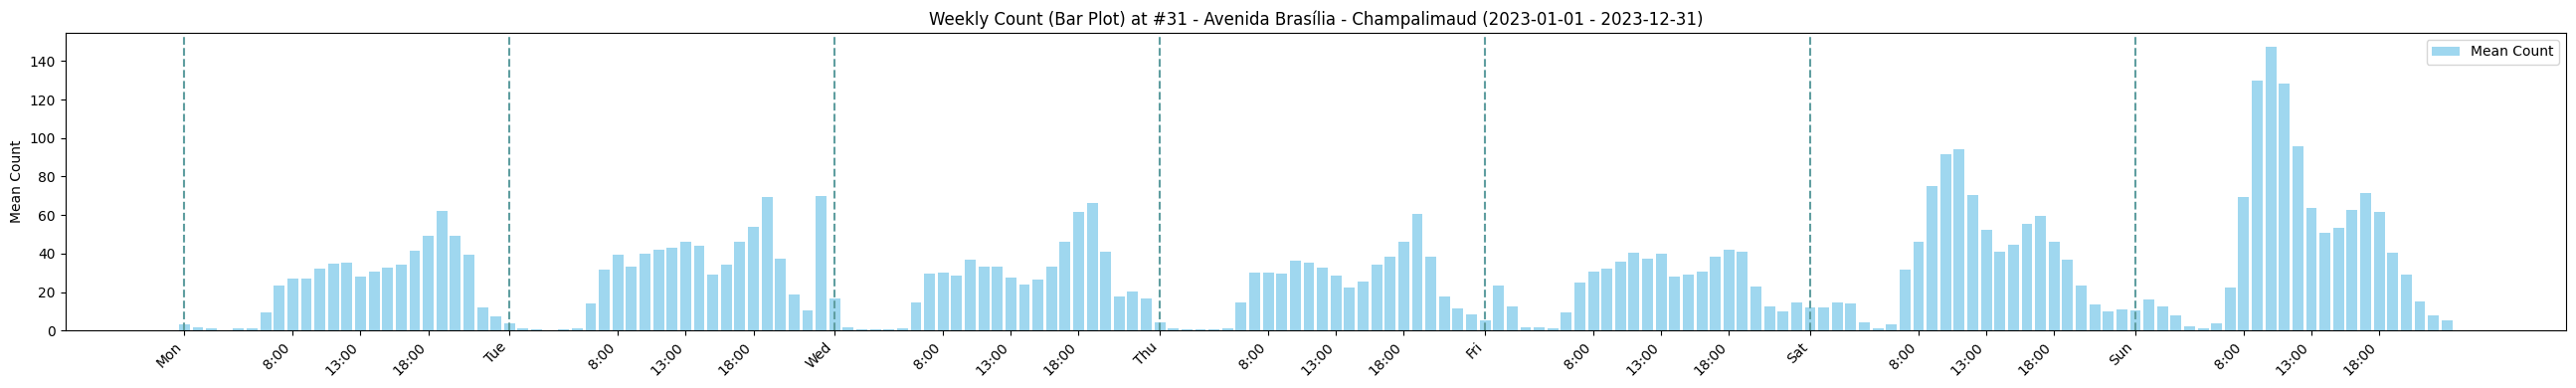

In [13]:
#localização 9 para o ano 2023 (utilização maior ao fim de semana)
location = 9
s_date ="2023-01-01"
e_date = "2023-12-31"
ticks_hours = [8, 13, 18]

plot_weekly_count(df, df_loc, s_date, e_date, location, ticks_hours)
plot_weekly_bar_count(df, df_loc, s_date, e_date, location, ticks_hours)

### Comparação das estações do ano

In [14]:
def get_season(date):
    if date.month in [12, 1, 2] or (date.month == 3 and date.day < 21):
        return 'Winter'
    elif date.month in [3, 4, 5] or (date.month == 6 and date.day < 21):
        return 'Spring'
    elif date.month in [6, 7, 8] or (date.month == 9 and date.day < 21):
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df.index.map(get_season)

# Preparar os dados para o gráfico de sazonalidade
def prep_seasonal_data(df_all, column):
    df_seasonal = df_all.groupby(['season', df_all.index.hour])[column].mean().unstack(level=0)
    return df_seasonal

def get_location_name(location_id, df_loc):
    return df_loc.query('locationId == @location_id').name.values[0]

# Gráfico de sazonalidade com linhas e título ajustado
def plot_seasonal_line_with_labels(df_all, df_loc, column, location, hour_list):
    location_name = get_location_name(location, df_loc)
    
    # Preparar os dados
    df_seasonal = prep_seasonal_data(df_all, column)
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plotar as linhas
    for season in df_seasonal.columns:
        ax.plot(df_seasonal.index, df_seasonal[season], label=season)
        
        # Adicionar o nome da estação próximo ao final da linha
        ax.text(
            x=df_seasonal.index[-1],  # Último valor do eixo X
            y=df_seasonal[season].iloc[-1],  # Último valor da linha no eixo Y
            s=season,  # Nome da estação
            fontsize=10, color=ax.lines[-1].get_color(),  # Mesma cor da linha
            ha='left', va='center'
        )
    
    # Configurações do gráfico
    ax.set_title(f'Seasonal Trends (Hourly Averages) - {location_name}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Average Count')
    ax.set_xticks(hour_list)  # Ajustar os horários no eixo X
    ax.set_xticklabels([f'{h}:00' for h in hour_list])
    ax.legend(title='Season')
    plt.grid(alpha=0.3)
    plt.show()

# Gráfico de sazonalidade com barras
def plot_seasonal_bar(df_all, column):
    df_seasonal = prep_seasonal_data(df_all, column)
    df_seasonal.plot(kind='bar', figsize=(14, 8), alpha=0.75)
    plt.title('Seasonal Trends (Hourly Averages)')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Count')
    plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.show()



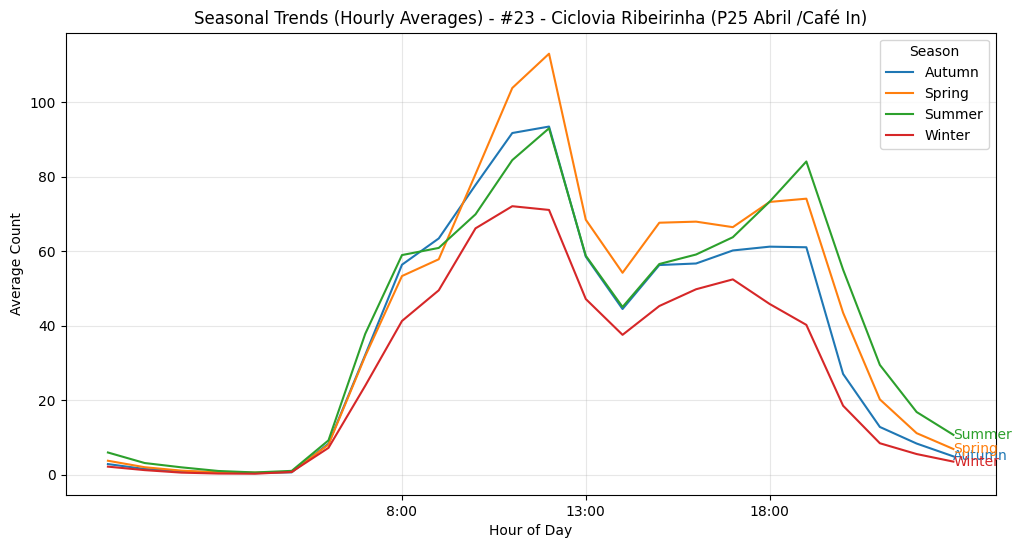

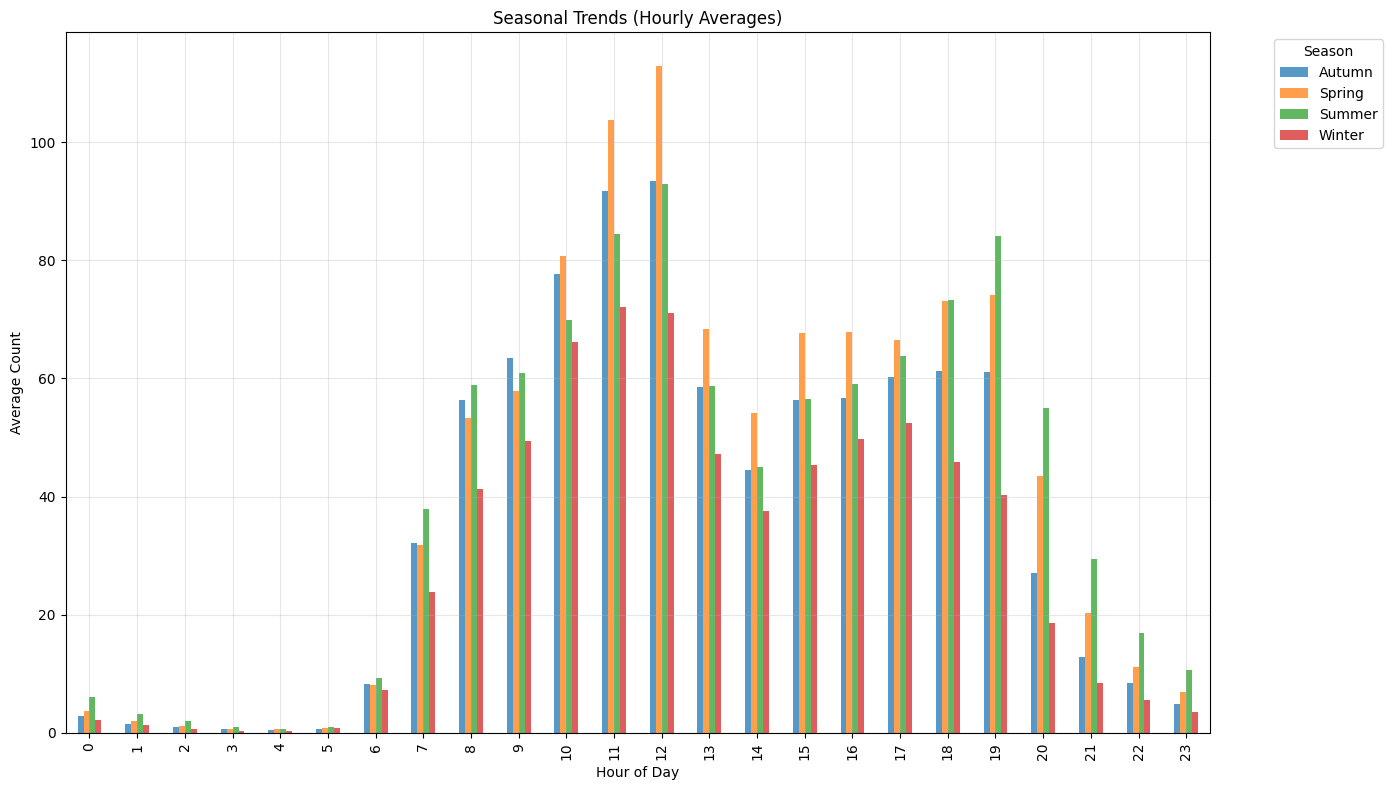

In [15]:
location = 12
column = f'count_{location}'
hour_list = [8, 13, 18]
plot_seasonal_line_with_labels(df, df_loc, column, location, hour_list)
plot_seasonal_bar(df, column)

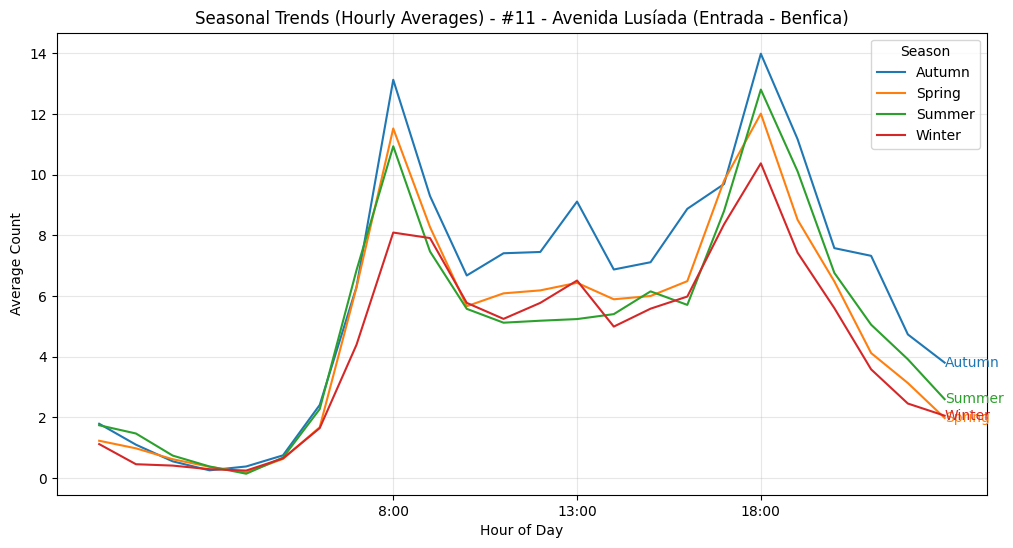

In [16]:
# Para apenas o ano de 2023
df_filtered = df[df.index.year == 2023]
location = 8
column = f'count_{location}'
hour_list = [8, 13, 18]
plot_seasonal_line_with_labels(df_filtered, df_loc, column, location, hour_list)

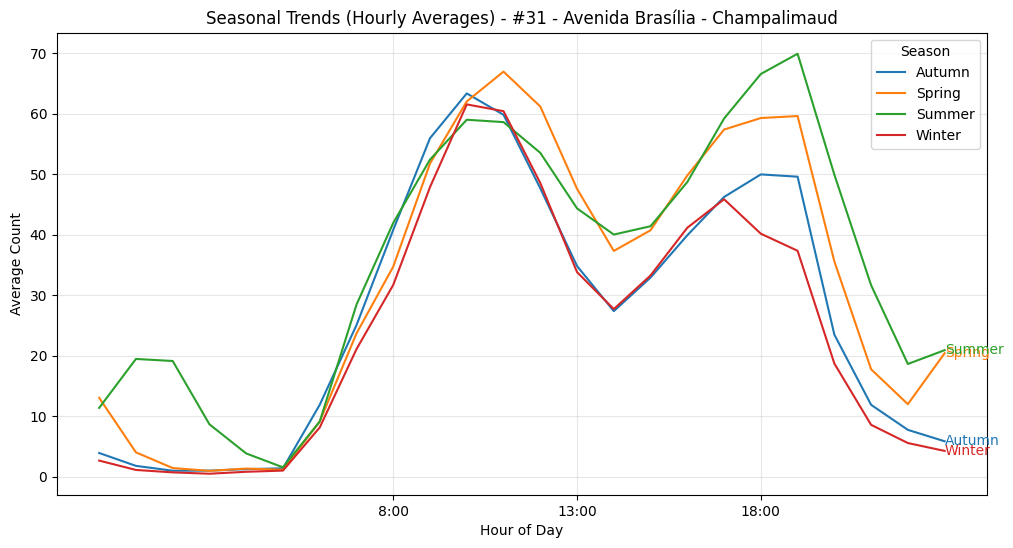

In [17]:
# para a localização 9
location = 9
column = f'count_{location}'
hour_list = [8, 13, 18]
plot_seasonal_line_with_labels(df, df_loc, column, location, hour_list)

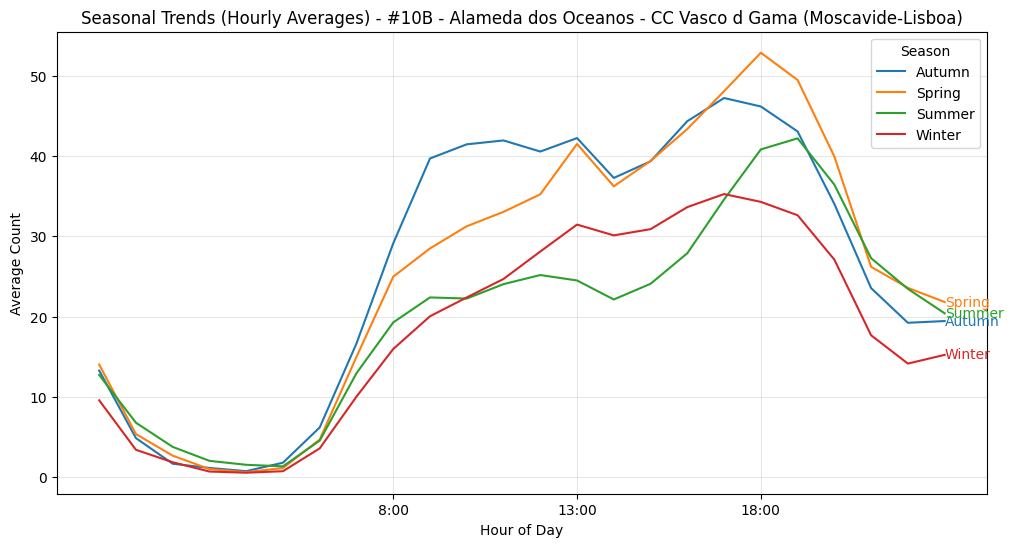

In [18]:
# para a locazação 21
location = 21
column = f'count_{location}'
hour_list = [8, 13, 18]
plot_seasonal_line_with_labels(df, df_loc, column, location, hour_list)

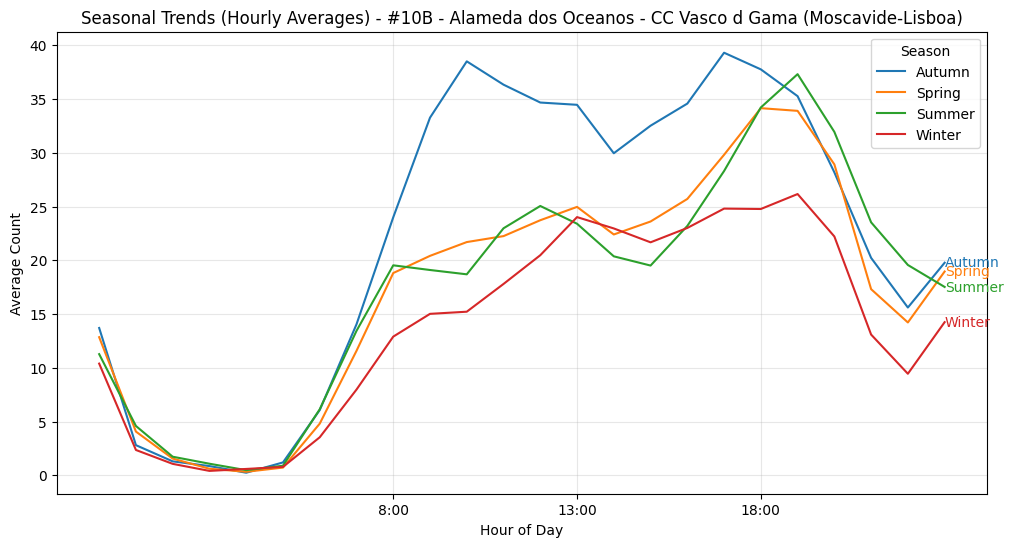

In [19]:
# Para apenas o ano de 2023
df_filtered = df[df.index.year == 2023]
location = 21
column = f'count_{location}'
hour_list = [8, 13, 18]
plot_seasonal_line_with_labels(df_filtered, df_loc, column, location, hour_list)

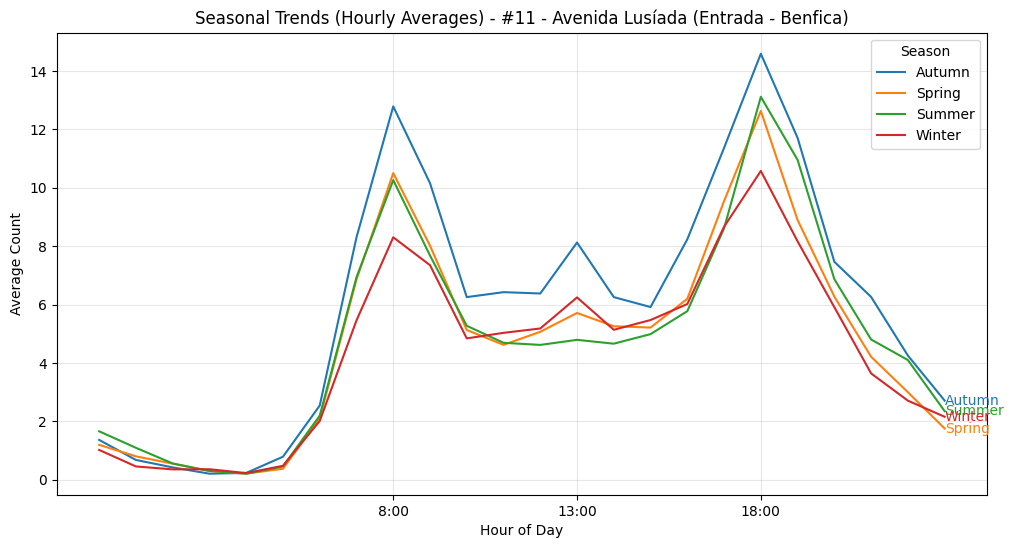

In [20]:
# Gráfico para dias úteis (segunda a sexta-feira)
df_filtered_weekdays = df[df.index.weekday < 5]  # 0 = segunda-feira, 4 = sexta-feira
location = 8
column = f'count_{location}'
hour_list = [8, 13, 18]
# Chamar a função com o DataFrame filtrado
plot_seasonal_line_with_labels(df_filtered_weekdays, df_loc, column, location, hour_list)


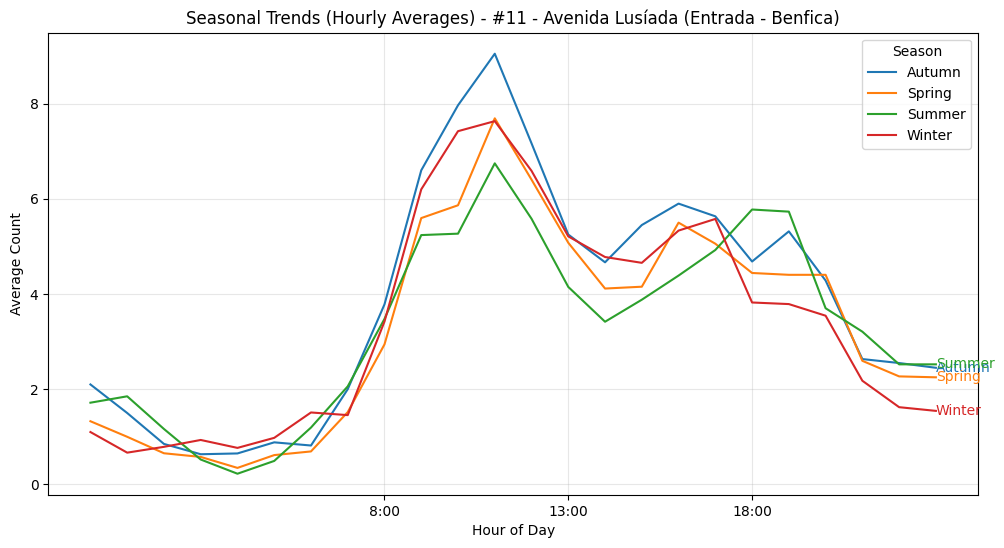

In [21]:
# Gráfico para o fim de semana 
df_filtered_weekend = df[df.index.weekday >= 5] 
location = 8
column = f'count_{location}'
hour_list = [8, 13, 18]
plot_seasonal_line_with_labels(df_filtered_weekend, df_loc, column, location, hour_list)


### Decomposição sazonal (STL)

In [ ]:
# Parâmetros para análise
start_date = '2022-01-01'
end_date = '2022-12-31'
location_id = 13
column_name = 'count'

# Obtém o nome da localização
location_name = df_loc.query('locationId == @location_id').name.values[0]

# Nome da coluna de contagem
column = f"{column_name}_{location_id}"

# Filtra os dados para o intervalo de datas especificado
df_filtered = df.loc[start_date:end_date]

# Extração da série temporal
series = df_filtered[column]

# Aplicação do MSTL 
mstl = MSTL(series, periods=[24, 24 * 7,365], iterate=3, 
            stl_kwargs={'seasonal_deg': 0, 'inner_iter': 2, 'outer_iter': 0})

# Executa a decomposição
res = mstl.fit()

In [59]:
print(res.seasonal.head())

                     seasonal_24  seasonal_168  seasonal_365
detected                                                    
2022-01-01 00:00:00   -27.732792      0.819269      2.132072
2022-01-01 01:00:00   -29.453651      4.983010      3.476110
2022-01-01 02:00:00   -35.185647      2.804895      4.185650
2022-01-01 03:00:00   -36.434596      0.242007     19.913492
2022-01-01 04:00:00   -35.740063      2.113781      5.648675


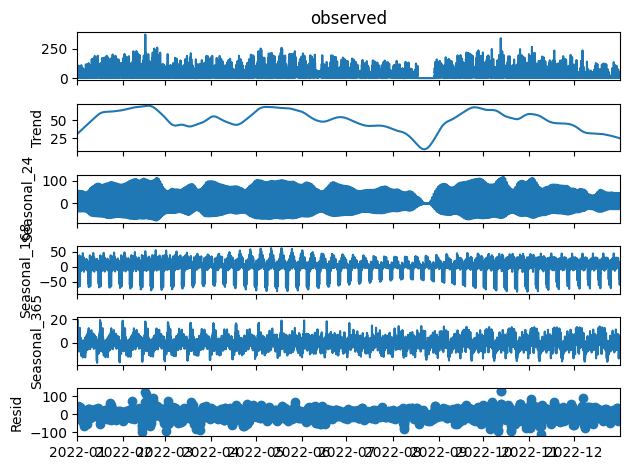

In [ ]:
# Gráfico
fig=res.plot() 
fig.set_size_inches((12,8))
plt.tight_layout()
plt.show()

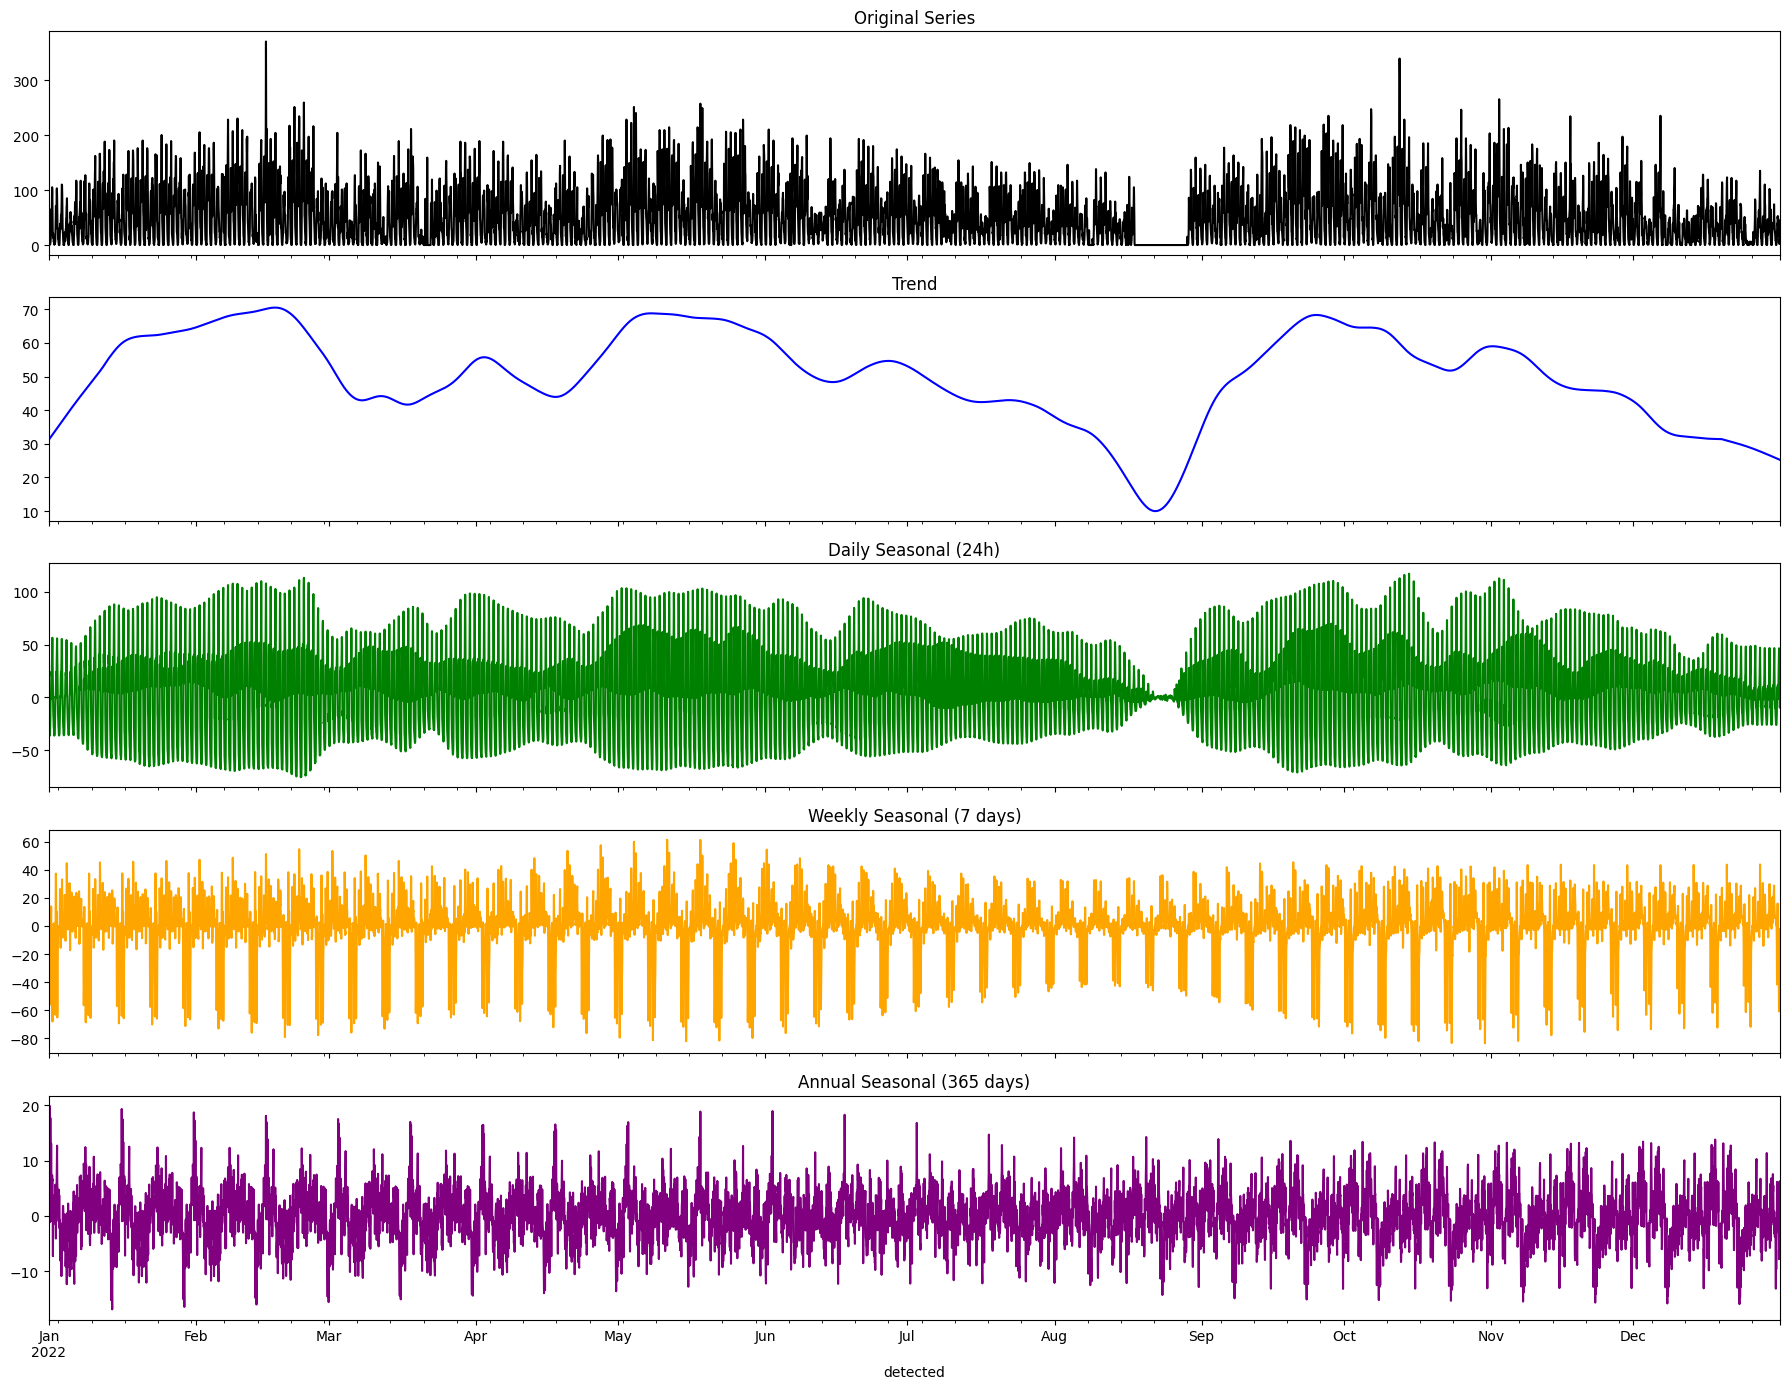

In [ ]:
# Criar um grafico com dimensôes maiores
fig, axes = plt.subplots(5, 1, figsize=(18, 14), sharex=True)

res.observed.plot(ax=axes[0], title='Original Series', color='black')

# Plotar a tendência
res.trend.plot(ax=axes[1], title='Trend', color='blue')

# Separar as 3 sazonalidades (diária, semanal e anual)
seasonal_daily = res.seasonal.iloc[:, 0]   # diária
seasonal_weekly = res.seasonal.iloc[:, 1]  # semanal
seasonal_annual = res.seasonal.iloc[:, 2]  # anual

# Plotar as sazonalidades separadamente
seasonal_daily.plot(ax=axes[2], title='Daily Seasonal (24h)', color='green')
seasonal_weekly.plot(ax=axes[3], title='Weekly Seasonal (7 days)', color='orange')
seasonal_annual.plot(ax=axes[4], title='Annual Seasonal (365 days)', color='purple'%%!)

# Ajustar layout
plt.tight_layout()
plt.show()


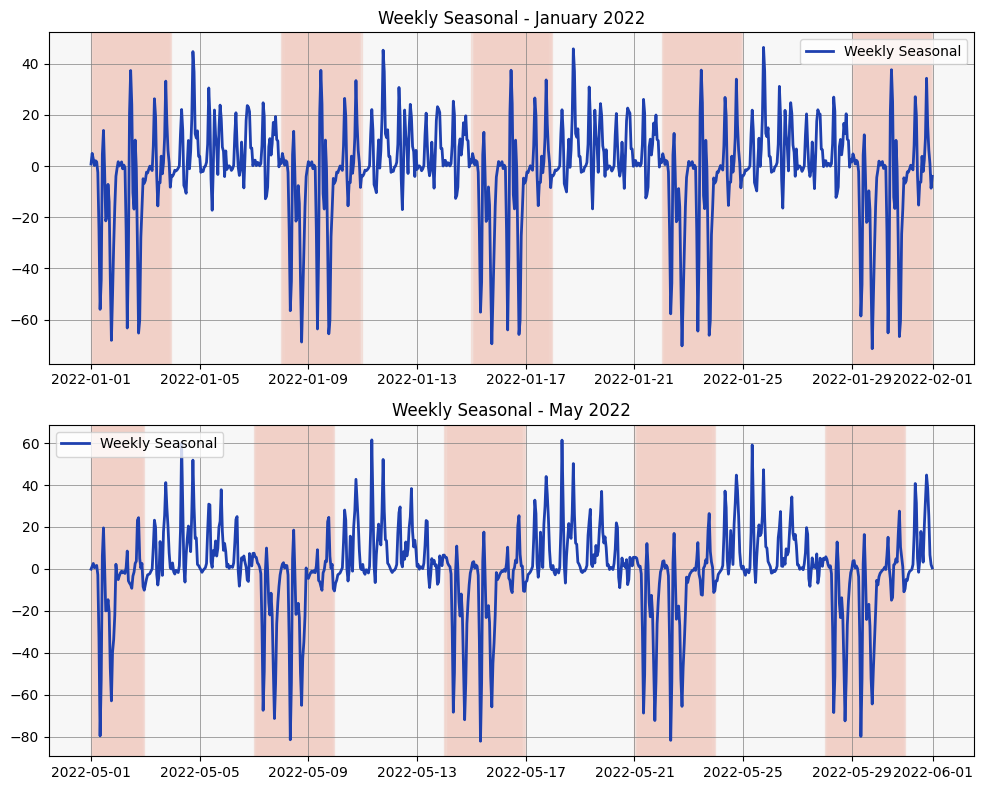

In [ ]:
# Focar em janeiro e maio
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Janeiro
janeiro_start = '2022-01-01'
janeiro_end = '2022-01-31'
janeiro_dates = df_filtered[janeiro_start:janeiro_end].index

# Maio
maio_start = '2022-05-01'
maio_end = '2022-05-31'
maio_dates = df_filtered[maio_start:maio_end].index

for ax in axes:
    ax.set_facecolor('#F7F7F7')  # Cor de fundo muito clara
    ax.grid(True, linestyle='-', linewidth=0.5, color='gray')  # Linhas da grade em cinza claro

# Plot da sazonalidade para Janeiro (componente sazonal semanal)
axes[0].plot(janeiro_dates, res.seasonal[janeiro_start:janeiro_end].iloc[:, 1], label='Weekly Seasonal', color='#1E40AF', linewidth=2)  
axes[0].set_title('Weekly Seasonal - January 2022', color='black')  

# Plot da sazonalidade para Maio (componente sazonal semanal)
axes[1].plot(maio_dates, res.seasonal[maio_start:maio_end].iloc[:, 1], label='Weekly Seasonal', color='#1E40AF', linewidth=2)  
axes[1].set_title('Weekly Seasonal - May 2022', color='black')  

# Destacar finais de semana com axvspan 
rosa_nude = '#F1D0C7' 
for ax, dates in zip(axes, [janeiro_dates, maio_dates]):
    for date in dates:
        # Verifica se o dia é um final de semana (sábado ou domingo)
        if date.weekday() >= 5:  # 5 é sábado, 6 é domingo
            ax.axvspan(date, date + pd.Timedelta(days=1), color=rosa_nude, alpha=0.5) 

# Ajuste do layout e do texto
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

